In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("2_Transactions_cleaned.csv")

In [3]:
df.shape

(1048575, 12)

In [4]:
df.head()

,Transaction_id,Transaction_date_time,Credit_card_number,Merchant,Transaction_category,Transaction_amount,Cardholder_fullname,Gender,Job,Date_of_birth,Fraud_status,Risk Level
0,0b242abb623afc578575680df30655b9,2019/01/01 00:00:18,2703186189652090,"Rippin, Kub and Mann",misc_net,4.97,Jennifer Banks,F,"Psychologist, counselling",1988/03/09 00:00:00,0,Low Risk
1,1f76529f8574734946361c461b024d99,2019/01/01 00:00:44,630423337322,"Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie Gill,F,Special educational needs teacher,1978/06/21 00:00:00,0,Low Risk
2,a1a22d70485983eac12b5b88dad1cf95,2019/01/01 00:00:51,38859492057661,Lind-Buckridge,entertainment,220.11,Edward Sanchez,M,Nature conservation officer,1962/01/19 00:00:00,0,Low Risk
3,6b849c168bdad6f867558c3793159a81,2019/01/01 00:01:16,3534093764340240,"Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy White,M,Patent attorney,1967/01/12 00:00:00,0,Low Risk
4,a41d7549acf90789359a9aa5346dcb46,2019/01/01 00:03:06,375534208663984,Keeling-Crist,misc_pos,41.96,Tyler Garcia,M,Dance movement psychotherapist,1986/03/28 00:00:00,0,Low Risk


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 12 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Transaction_id         1048575 non-null  object 
 1   Transaction_date_time  1048575 non-null  object 
 2   Credit_card_number     1048575 non-null  int64  
 3   Merchant               1048575 non-null  object 
 4   Transaction_category   1048575 non-null  object 
 5   Transaction_amount     1048575 non-null  float64
 6   Cardholder_fullname    1048575 non-null  object 
 7   Gender                 1048575 non-null  object 
 8   Job                    1048575 non-null  object 
 9   Date_of_birth          1048575 non-null  object 
 10  Fraud_status           1048575 non-null  int64  
 11  Risk Level             1048575 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 96.0+ MB


In [6]:
df.describe()

,Credit_card_number,Transaction_amount,Fraud_status
count,1.048575e+06,1.048575e+06,1.048575e+06
mean,4.171565e+17,7.027910e+01,5.727773e-03
std,1.308811e+18,1.599518e+02,7.546503e-02
min,6.041621e+10,1.000000e+00,0.000000e+00
25%,1.800400e+14,9.640000e+00,0.000000e+00
50%,3.520550e+15,4.745000e+01,0.000000e+00
75%,4.642255e+15,8.305000e+01,0.000000e+00
max,4.992346e+18,2.894890e+04,1.000000e+00


In [7]:
df.drop_duplicates(subset=['Transaction_id'])

,Transaction_id,Transaction_date_time,Credit_card_number,Merchant,Transaction_category,Transaction_amount,Cardholder_fullname,Gender,Job,Date_of_birth,Fraud_status,Risk Level
0,0b242abb623afc578575680df30655b9,2019/01/01 00:00:18,2703186189652090,"Rippin, Kub and Mann",misc_net,4.97,Jennifer Banks,F,"Psychologist, counselling",1988/03/09 00:00:00,0,Low Risk
1,1f76529f8574734946361c461b024d99,2019/01/01 00:00:44,630423337322,"Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie Gill,F,Special educational needs teacher,1978/06/21 00:00:00,0,Low Risk
2,a1a22d70485983eac12b5b88dad1cf95,2019/01/01 00:00:51,38859492057661,Lind-Buckridge,entertainment,220.11,Edward Sanchez,M,Nature conservation officer,1962/01/19 00:00:00,0,Low Risk
3,6b849c168bdad6f867558c3793159a81,2019/01/01 00:01:16,3534093764340240,"Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy White,M,Patent attorney,1967/01/12 00:00:00,0,Low Risk
4,a41d7549acf90789359a9aa5346dcb46,2019/01/01 00:03:06,375534208663984,Keeling-Crist,misc_pos,41.96,Tyler Garcia,M,Dance movement psychotherapist,1986/03/28 00:00:00,0,Low Risk
...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,45ecd198c65e81e597db22e8d2ef7361,2020/03/10 16:07:29,6011975266774120,Fadel Inc,health_fitness,77.00,Haley Wagner,F,"Accountant, chartered certified",1943/05/28 00:00:00,0,Low Risk
1048571,c00ce51c6ebb7657474a77b9e0b51f34,2020/03/10 16:07:50,4839043708100390,"Cremin, Hamill and Reichel",misc_pos,116.94,Meredith Campbell,F,Geochemist,1999/06/28 00:00:00,0,Low Risk
1048572,17c9dc8b2a6449ca2473726346e58e6c,2020/03/10 16:08:31,571844099986,"O'Connell, Botsford and Hand",home,21.27,Susan Mills,F,Engineering geologist,1952/04/02 00:00:00,0,Low Risk
1048573,5ca650881b48a6a38754f841c23b77ab,2020/03/10 16:08:38,4646845581490330000,Thompson-Gleason,health_fitness,9.52,Julia Bell,F,Film/video editor,1990/06/25 00:00:00,0,Low Risk


In [8]:
df.isnull()

,Transaction_id,Transaction_date_time,Credit_card_number,Merchant,Transaction_category,Transaction_amount,Cardholder_fullname,Gender,Job,Date_of_birth,Fraud_status,Risk Level
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,False,False,False,False,False,False,False,False,False,False,False,False
1048571,False,False,False,False,False,False,False,False,False,False,False,False
1048572,False,False,False,False,False,False,False,False,False,False,False,False
1048573,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

Transaction_id           0
Transaction_date_time    0
Credit_card_number       0
Merchant                 0
Transaction_category     0
Transaction_amount       0
Cardholder_fullname      0
Gender                   0
Job                      0
Date_of_birth            0
Fraud_status             0
Risk Level               0
dtype: int64

In [10]:
# Risk Category Distribution
df["Risk Level"].value_counts()

Risk Level
Low Risk       1045397
Medium Risk       3065
High Risk          113
Name: count, dtype: int64

In [11]:
df["Transaction_date_time"] = pd.to_datetime(df["Transaction_date_time"])


In [12]:
# Fraud Trends Over Time
fraud_trend = df[df["Fraud_status"] == 1].groupby(df["Transaction_date_time"].dt.to_period("M"))["Fraud_status"].count()

print(fraud_trend)

Transaction_date_time
2019-01    506
2019-02    517
2019-03    494
2019-04    376
2019-05    408
2019-06    354
2019-07    331
2019-08    382
2019-09    418
2019-10    454
2019-11    388
2019-12    592
2020-01    343
2020-02    336
2020-03    107
Freq: M, Name: Fraud_status, dtype: int64


In [13]:
# Top 10 High Risk Customers
high_risk_customers = df[df["Risk Level"] == "High Risk"].groupby("Cardholder_fullname")["Transaction_amount"].sum().sort_values(ascending=False)
print(high_risk_customers.head(10))

Cardholder_fullname
Juan Sherman         31793.25
Kelly Zimmerman      28948.90
Christopher Henry    27390.12
Brandon Pittman      26544.12
Kenneth Foster       25086.94
Donna Davis          21255.46
Gina Grimes          17897.24
Kayla Jones          16488.70
Chris White          15619.57
Rachel Daniels       14630.68
Name: Transaction_amount, dtype: float64


In [14]:
df.to_csv("Transactions_Python_final.csv", index = False)

In [15]:
sns.set(style='whitegrid')

In [35]:
# KPIs 
total_transactions = df.shape[0]
print(f"Total Transactions: {total_transactions}")

total_amount = df['Transaction_amount'].sum()
print(f"Total Amount: ${total_amount:,.0f}")

avg_amount = df['Transaction_amount'].mean()
print(f"Average Amount: ${avg_amount:,.0f}")

fraud_transactions = df[df['Fraud_status'] == 1].shape[0]
print(f"Fraud Percentage: {fraud_percentage:.2f}%")

fraud_percentage = (fraud_transactions / total_transactions) * 100
print(f"Fraud Transactions: {fraud_transactions}")

Total Transactions: 1048575
Total Amount: $73,692,902
Average Amount: $70
Fraud Percentage: 0.57%
Fraud Transactions: 6006


In [27]:
risk_distribution_pct = df['Risk Level'].value_counts(normalize=True) * 100
risk_distribution_pct

Risk Level
Low Risk       99.696922
Medium Risk     0.292301
High Risk       0.010777
Name: proportion, dtype: float64

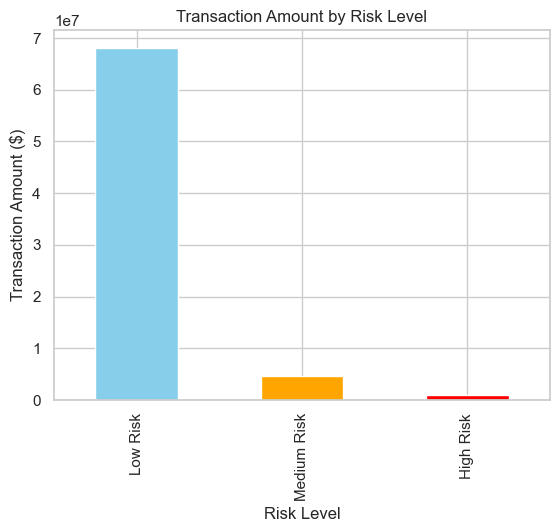

In [28]:
risk_amount = df.groupby('Risk Level')['Transaction_amount'].sum().sort_values(ascending=False)
risk_amount.plot(kind='bar', color=['skyblue', 'orange', 'red'], title='Transaction Amount by Risk Level')
plt.ylabel('Transaction Amount ($)')
plt.show()

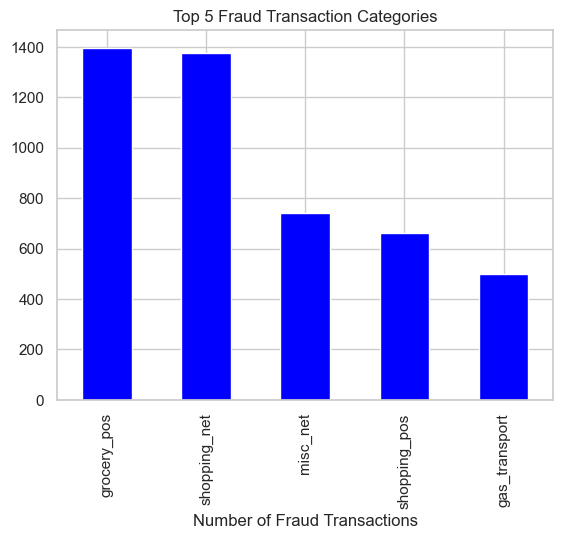

In [32]:
top_categories = df[df['Fraud_status'] == 1]['Transaction_category'].value_counts().head(5)
top_categories.plot(kind='bar', color='blue', title='Top 5 Fraud Transaction Categories')
plt.xlabel('Number of Fraud Transactions')
plt.show()

In [34]:
high_risk_customers = df[df['Risk Level'] == 'High Risk']
top_customers = high_risk_customers.groupby('Cardholder_fullname')['Transaction_amount'].sum().sort_values(ascending=False).head(10).reset_index()
top_customers['Risk Level'] = 'High Risk'

print(top_customers)

  Cardholder_fullname  Transaction_amount Risk Level
0        Juan Sherman            31793.25  High Risk
1     Kelly Zimmerman            28948.90  High Risk
2   Christopher Henry            27390.12  High Risk
3     Brandon Pittman            26544.12  High Risk
4      Kenneth Foster            25086.94  High Risk
5         Donna Davis            21255.46  High Risk
6         Gina Grimes            17897.24  High Risk
7         Kayla Jones            16488.70  High Risk
8         Chris White            15619.57  High Risk
9      Rachel Daniels            14630.68  High Risk
